In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,Fecha_registro,Fecha_contacto,Id,Genero,Casado,Dependientes,Educacion,Trabaja_para_el,Salario,Salario_Pareja,Credito_pedido,Plazo_prestamo,Historial_crediticio,Area_vivienda,Estatus_prestamo,Asesor_asignado
0,02/26/2019 11:00 AM,02/27/2019 12:03 PM,LP002519,Hombre,1,4,1,No,4691.0,0.0,100.0,360.0,1,Semiurbana,1,Dudley
1,02/27/2019 02:52 PM,02/26/2019 07:43 AM,LP001280,Hombre,1,2,0,No,3333.0,2000.0,99.0,360.0,1,Semiurbana,1,Pablo
2,02/27/2019 08:18 AM,02/28/2019 02:27 PM,LP001151,Mujer,0,0,1,No,4000.0,2275.0,144.0,360.0,1,Semiurbana,1,Dudley
3,02/28/2019 10:00 AM,03/01/2019 12:57 PM,LP002036,Hombre,1,0,1,No,2058.0,2134.0,88.0,360.0,1,Urbana,1,Ana
4,02/26/2019 07:40 AM,02/27/2019 04:35 PM,LP002894,Mujer,1,0,1,No,3166.0,0.0,36.0,360.0,1,Semiurbana,1,Regina


# Análisis de correlación
La variable objetivo es ['Estatus_prestamo']


In [3]:
correlations = df.corr()['Estatus_prestamo']

print(correlations.sort_values(ascending=False))


Estatus_prestamo        1.000000
Historial_crediticio    0.560134
Casado                  0.074108
Educacion               0.055208
Dependientes           -0.005219
Salario                -0.045849
Plazo_prestamo         -0.047869
Credito_pedido         -0.088074
Salario_Pareja         -0.106528
Name: Estatus_prestamo, dtype: float64


C:\Users\trish\AppData\Local\Temp\ipykernel_11552\335936557.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Estatus_prestamo']


C:\Users\trish\AppData\Local\Temp\ipykernel_11552\3691711562.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")


<Axes: >

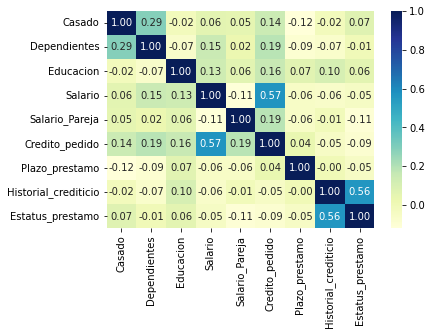

In [4]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")


(0.0, 1.05)

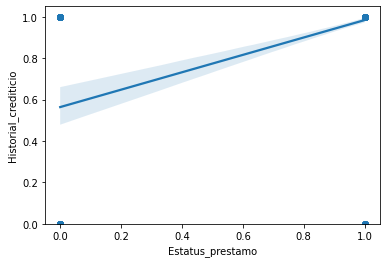

In [5]:
sns.regplot(x='Estatus_prestamo', y='Historial_crediticio', data=df)
plt.ylim(0,)


En este caso, los resultados indican que ['Historial_crediticio'] tiene la correlación positiva más alta con la variable objetivo ['Estatus_prestamo'] (0.56), lo que podría significar que a medida que aumenta ['Historial_crediticio'], también aumenta la probabilidad de que se apruebe un préstamo. Esta es una correlación positiva moderada, lo que sugiere una relación significativa entre estas dos variables.

También se observa una pequeña correlación positiva con las variables ['Casado'] y ['Educacion']. Esto sugiere que los solicitantes con niveles de educación más altos o los que están casados podrían tener más probabilidades de obtener un préstamo.

Por otro lado, ['Salario'] y ['Salario_pareja'] tienen correlaciones negativas con la variable objetivo, aunque las correlaciones son débiles. Esto sugiere que los solicitantes con salarios más bajos o cuyas parejas tienen salarios más bajos pueden tener más probabilidades de obtener un préstamo.

Por último, ['Plazo_prestamo'] y ['Credit_pedido'] también tienen correlaciones negativas débiles con ['Estatus_prestamo'], lo que indica que las personas que solicitan préstamos más grandes o que tienen períodos de préstamo más largos pueden tener menos probabilidades de obtener un préstamo.

# Agrupar data por ['Estatus_prestamo'] 
Calcular mediana, promedio y desviación standard para ['Salario'] y ['Salario_Pareja']

In [6]:

stats = df.groupby('Estatus_prestamo')[['Salario', 'Salario_Pareja']].agg(
    ['mean', 'median', 'std'])


In [7]:
print(stats)

                      Salario                      Salario_Pareja          \
                         mean  median          std           mean  median   
Estatus_prestamo                                                            
0                 6041.247863  3875.0  8387.818237    2293.726496  1451.0   
1                 5329.250000  3793.5  5663.461102    1523.950091  1280.0   

                               
                          std  
Estatus_prestamo               
0                 5191.809668  
1                 1935.427825  


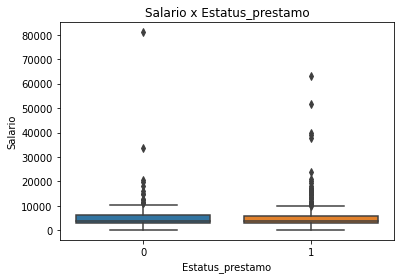

In [8]:

sns.boxplot(x='Estatus_prestamo', y='Salario', data=df)

plt.title('Salario x Estatus_prestamo')
plt.xlabel('Estatus_prestamo')
plt.ylabel('Salario')

# Show plot
plt.show()


Parece que a las personas a las que se les concedió un préstamo tendieron a tener valores medios y medianos más bajos para ['Salario'] y ['Salario_Pareja'] en comparación con aquellas a las que no se les concedió un préstamo. Esto podría significar una correlación negativa entre estas variables y la variable objetivo.
En el gráfico observamos la presencia de outliers que podrían estar incidiendo en el resultado

# Agrupar datos para checar outliers

In [9]:
bins = np.linspace(min(df['Salario']), max(df['Salario']), 4)
bins

array([  150., 27100., 54050., 81000.])

In [10]:
grupos = ['Bajo', 'Medio', 'Alto']

In [11]:
df['Salario-agrupado'] = pd.cut(df['Salario'], bins, labels=grupos, include_lowest=True )
df[['Salario','Salario-agrupado']].sample(6)

,Salario,Salario-agrupado
517,2492.0,Bajo
205,6256.0,Bajo
51,6383.0,Bajo
501,2149.0,Bajo
543,12841.0,Bajo
113,2301.0,Bajo


In [12]:
df['Salario-agrupado'].value_counts()

Bajo     550
Medio      5
Alto       2
Name: Salario-agrupado, dtype: int64

Text(0.5, 1.0, 'grupos')

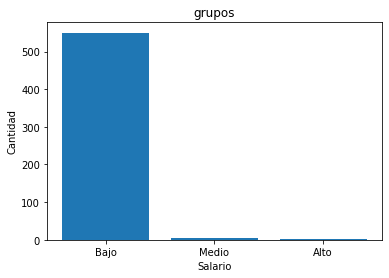

In [13]:
plt.bar(grupos, df['Salario-agrupado'].value_counts())
plt.xlabel("Salario")
plt.ylabel("Cantidad")
plt.title("grupos")

La presencia de outliers es relativamente baja

# Agrupando por ['Area_vivienda']

In [14]:
df['Area_vivienda'].unique()

array(['Semiurbana', 'Urbana', 'Rural'], dtype=object)

In [15]:
df_grupo_viv = df[['Area_vivienda','Estatus_prestamo']]

In [16]:
df_grupo_viv = df_grupo_viv.groupby(['Area_vivienda'],as_index=False).mean()
df_grupo_viv

,Area_vivienda,Estatus_prestamo
0,Rural,0.718750
1,Semiurbana,0.861751
2,Urbana,0.766667


Parece que la ubicación del área de vivienda es un factor significativo en la aprobación del préstamo. Las áreas semiurbanas tienen la proporción más alta de préstamos aprobados, mientras que las áreas rurales tienen la proporción más baja.

In [17]:
df_gptest = df[['Area_vivienda', 'Casado', 'Estatus_prestamo']]
grupo_test = df_gptest.groupby(
    ['Area_vivienda', 'Casado'], as_index=False).mean()
grupo_test


,Area_vivienda,Casado,Estatus_prestamo
0,Rural,0,0.678571
1,Rural,1,0.740385
2,Semiurbana,0,0.855072
3,Semiurbana,1,0.864865
4,Urbana,0,0.688525
5,Urbana,1,0.806723


In [18]:
grouped_pivot = grupo_test.pivot(index='Area_vivienda', columns='Casado')
grouped_pivot


Estatus_prestamo          
Casado                       0         1
Area_vivienda                           
Rural                 0.678571  0.740385
Semiurbana            0.855072  0.864865
Urbana                0.688525  0.806723

Estos datos muestran que en las zonas rurales, los que están casados ​​tienen una mayor tasa de aprobación de préstamos en comparación con los que no están casados. De manera similar, en las áreas urbanas, quienes están casados ​​tienen una tasa de aprobación de préstamos ligeramente más alta en comparación con quienes no están casados. En áreas semiurbanas, la tasa de aprobación de préstamos es alta para quienes están casados. 

In [19]:
df_grupo_est = df[['Casado','Estatus_prestamo']]

In [20]:
df_grupo_est = df_grupo_est.groupby(['Casado'], as_index=False).mean()
df_grupo_est


,Casado,Estatus_prestamo
0,0,0.747312
1,1,0.811321


En general estos datos muestran que las personas casadas tienen una ligera ventaja a la hora de acceder a un crédito

In [22]:
from scipy import stats

In [23]:
pearson_coef, p_value = stats.pearsonr(
    df['Historial_crediticio'], df['Estatus_prestamo'])
print("The Pearson Correlation Coefficient is",
      pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.5601343908344556  with a P-value of P = 2.5314931745727673e-47


Estos resultados indican una correlación positiva entre las variables. El coeficiente de correlación de Pearson sugiere que existe una relación lineal entre estas dos variables, por lo que a medida que aumenta el valor de ["Historial_crediticio"], también aumenta la probabilidad de que se apruebe un préstamo.
El valor P indica que esta correlación es estadísticamente significativa y es poco probable que haya ocurrido por casualidad. Por lo tanto, podemos concluir que ["Historial_crediticio"] es un fuerte predictor de ["Estatus_préstamo"] y puede usarse como una característic 

In [25]:
pearson_coef, p_value = stats.pearsonr(
    df['Educacion'], df['Estatus_prestamo'])
print("The Pearson Correlation Coefficient is",
      pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.05520835935902825  with a P-value of P = 0.19324839830849502


No se puede concluir que exista una correlación significativa entre las dos variables

In [26]:
pearson_coef, p_value = stats.pearsonr(
    df['Casado'], df['Estatus_prestamo'])
print("The Pearson Correlation Coefficient is",
      pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.07410793351593073  with a P-value of P = 0.08055334652445285


El coeficiente de correlación de Pearson indica una correlación positiva débil entre las dos variables que se comparan. El valor p sugiere que existe un nivel moderado de significación estadística para esta correlación.

In [27]:
pearson_coef, p_value = stats.pearsonr(
    df['Dependientes'], df['Estatus_prestamo'])
print("The Pearson Correlation Coefficient is",
      pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.0052185567779376345  with a P-value of P = 0.902196962869311


No existe una correlación estadísticamente significativa entre ['Dependientes'] y la variable objetivo.

In [28]:
pearson_coef, p_value = stats.pearsonr(
    df['Salario'], df['Estatus_prestamo'])
print("The Pearson Correlation Coefficient is",
      pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.045848571329201414  with a P-value of P = 0.28005206082774786


Existe una correlación negativa débil entre las variables que se analizan ['Salario'] y ['Estatus_Préstamo'], lo que significa que a medida que aumenta el salario, existe una ligera tendencia a disminuir ['Estatus_Préstamo']. Sin embargo, el coeficiente de correlación es muy pequeño, lo que indica que no existe una fuerte relación lineal entre las dos variables. El valor P indica que no hay evidencia significativa para rechazar la idea de que no están relacionadas en absoluto.